### 수면의 질에 관한 상관관계
- 데이터 : Sleep_health_and_lifestyle_dataset.csv
- 타겟 몇 개를 제외하고 전체를 피쳐를 잡거나 2개~3개로 피쳐로 잡아서 관계 알아보기
- 피쳐 : Heart Rate, Daily Steps
- 타겟 : sleep Disorder
- 기계학습 : 1. 지도학습 + 분류(KNN Classifier)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = './data/Sleep_health_and_lifestyle_dataset.csv'

In [3]:
sleepDF = pd.read_csv(data)
sleepDF

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
# 데이터 확인
sleepDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
# 중복데이터
sleepDF.duplicated().sum()

0

In [6]:
# 결측치 체크
sleepDF.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
# 결측치 None으로 대체
sleepDF = sleepDF.fillna('None')

In [8]:
sleepDF

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [9]:
# Sleep Apnea', 'Insomnia' 두 가지 데이터만 추출 
mask = sleepDF['Sleep Disorder'].isin(['None','Sleep Apnea', 'Insomnia'])

# 해당 행만 도출
twosleepDF = sleepDF[mask]

# 인덱스 정리
twosleepDF = twosleepDF.reset_index(drop=True)

In [10]:
# Sleep Duration 컬럼
ret1 = twosleepDF['Heart Rate'] - twosleepDF['Heart Rate'].mean()
ret1 = ret1/twosleepDF['Heart Rate'].std()

In [11]:
# Length 컬럼
ret2 = twosleepDF['Daily Steps'] - twosleepDF['Daily Steps'].mean()
ret2 = ret2/twosleepDF['Daily Steps'].std()

In [12]:
# 피쳐 데이터 추출
feature = twosleepDF[twosleepDF.columns[10:12]]
feature.head()

,Heart Rate,Daily Steps
0,77,4200
1,75,10000
2,75,10000
3,85,3000
4,85,3000


In [13]:
# 타겟 데이터 추출
target = twosleepDF['Sleep Disorder']

target=target.replace({'None':0, 'Sleep Apnea':1, 'Insomnia':2}).copy()

# 데이터 확인
print(target.head(3), target.tail(3), sep='\n\n')

0    0
1    0
2    0
Name: Sleep Disorder, dtype: int64

371    1
372    1
373    1
Name: Sleep Disorder, dtype: int64


In [14]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, stratify=target, random_state=42)

In [16]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---->\n{X_train.shape}, {y_train}')
print(f'{y_train.value_counts()/y_train.shape[0]}')

print(f'테스트용 데이터셋 ---->\n{X_test.shape}, {y_test}')
print(f'{X_test.value_counts()/y_test.shape[0]}')

학습용 데이터셋 ---->
(299, 2), 270    1
200    2
142    0
329    0
355    1
      ..
48     0
264    2
77     0
209    0
126    0
Name: Sleep Disorder, Length: 299, dtype: int64
Sleep Disorder
0    0.585284
1    0.207358
2    0.207358
Name: count, dtype: float64
테스트용 데이터셋 ---->
(75, 2), 68     0
58     0
196    2
191    2
60     0
      ..
21     0
174    0
362    1
104    1
368    1
Name: Sleep Disorder, Length: 75, dtype: int64
Heart Rate  Daily Steps
68          7000           0.213333
70          8000           0.173333
72          6000           0.133333
65          5000           0.106667
68          8000           0.080000
75          10000          0.080000
72          5000           0.066667
65          6000           0.053333
76          5500           0.026667
65          10000          0.013333
69          6800           0.013333
75          5500           0.013333
77          4200           0.013333
80          4000           0.013333
Name: count, dtype: float64


In [17]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler
import joblib

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler()

In [20]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [21]:
scaler.mean_

array([  70.26086957, 6806.02006689])

In [22]:
# 학습용 데이터 피쳐 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(299, 2)

In [23]:
# 테스트용 데이터 피쳐 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(75, 2)

In [24]:
# 모듈 로딩
import matplotlib.pyplot as plt

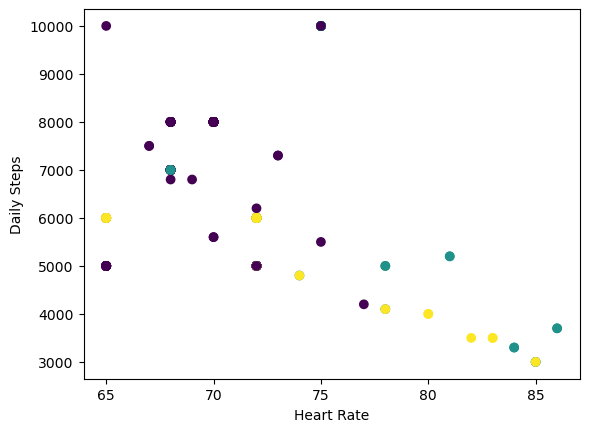

In [25]:
## => 원본 데이터 시각화
plt.scatter(X_train['Heart Rate'], X_train['Daily Steps'], c=y_train)
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')
plt.show()

In [26]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#(4-1) KNN 알고리즘
sleepmodel = KNeighborsClassifier()
sleepmodel.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [28]:
# 방법 (2) : SVC
from sklearn.svm import SVC

sleepmodel2=SVC()

sleepmodel2.fit(scaled_X_train, y_train)

SVC()

In [29]:
# 방법 (3) : LogisticRegression
from sklearn.linear_model import LogisticRegression

sleepmodel3 = LogisticRegression()

sleepmodel3.fit(scaled_X_train, y_train)

LogisticRegression()

In [30]:
import joblib
import os

def save_model(model, model_name):
    # 모델 저장하는 함수
    model_dir = 'model/'
    model_filename = model_dir + f'{model_name}.pkl'
    
    # 저장 폴더 존재여부 확인 후 저장
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    joblib.dump(model, model_filename)

In [31]:
save_model(sleepmodel2, sleepmodel2)

In [32]:
save_model(sleepmodel3, sleepmodel3)

In [33]:
print('KNN train', sleepmodel.score(scaled_X_train, y_train))
print('SVC train', sleepmodel2.score(scaled_X_train, y_train))
print('LogisticRegression train', sleepmodel3.score(scaled_X_train, y_train))
print('')
print('KNN test', sleepmodel.score(scaled_X_test, y_test))
print('SVC test', sleepmodel2.score(scaled_X_test, y_test))
print('LogisticRegression test', sleepmodel3.score(scaled_X_test, y_test))

KNN train 0.7959866220735786
SVC train 0.822742474916388
LogisticRegression train 0.7023411371237458

KNN test 0.7733333333333333
SVC test 0.7466666666666667
LogisticRegression test 0.6


In [34]:
## 수면 질병 예측
new_data = pd.DataFrame([[65, 5000]], columns=twosleepDF.columns[10:12])

In [35]:
# 피쳐스케일링 진행
scaled_new_data = scaler.transform(new_data)

In [36]:
# 예측
sleepmodel.predict(scaled_new_data)

array([0], dtype=int64)

In [37]:
sleepmodel2.predict(scaled_new_data)

array([0], dtype=int64)

In [38]:
sleepmodel3.predict(scaled_new_data)

array([0], dtype=int64)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(scaled_X_train,y_train)
rf_model.score(scaled_X_test,y_test)

0.8

In [40]:
rf_model.predict(scaled_new_data)

array([0], dtype=int64)